In [1]:
#pip install pandas numpy matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Winner

In [3]:
df = pd.read_csv("d:\\Projects\\Dread\\Analysis\\result.csv", sep=";");

## Zwycięstwa

In [4]:
df.groupby(["WhoWon"]).count().reset_index()

,WhoWon,Run
0,RU,591
1,UA,409


# Fight

## Dataframe

In [5]:
df = pd.read_csv("d:\\Projects\\Dread\\Analysis\\data.csv", sep=";");
df.head(10)

,Run,Round,Side,Status,Weapon,Type,Device,ACC,TargetWeapon,StartingState,Dmg,StateAfterHit,Morale,MoraleAfterHit,Distance
0,0,37,UA,MISS,BMP1,IFV,2A42,0.0,120mmMortar,200,0,0,0.0,0.0,2201863700
1,0,37,UA,HIT,T72B3,Tank,2A46,0.6,120mmMortar,600,0,600,1.0,0.9,2200
2,0,37,RU,MISS,BMP1,IFV,2A42,0.6,T72B3,200,0,600,1.0,0.9,2200
3,0,37,RU,MISS,T72B3,Tank,2A46,0.6,T72B3,600,0,600,1.0,0.9,2200
4,0,38,UA,HIT,BMP1,IFV,2A42,0.4,T72B3,200,20,180,1.0,0.9,2100
5,0,38,UA,MISS,T72B3,Tank,2A46,0.4,T72B3,600,20,180,1.0,0.9,2100
6,0,38,RU,MISS,BMP1,IFV,2A42,0.4,T72B3,200,20,180,1.0,0.9,2100
7,0,38,RU,HIT,T72B3,Tank,2A46,0.6,T72B3,600,600,0,1.0,0.0,2100
8,0,39,UA,MISS,BMP1,IFV,2A42,0.6,Akatsia,180,600,0,1.0,0.0,2100
9,0,39,UA,HIT,T72B3,Tank,2A46,0.6,Akatsia,600,600,0,1.0,0.0,2000


## Weapon system hit / miss chart

In [6]:
df.groupby(['Side', 'Weapon', 'Device', 'Status']).size().reset_index(name='Occured').sort_values(['Weapon', 'Side', 'Status'], ascending=False)

,Side,Weapon,Device,Status,Occured
15,UA,T72B3,2A46,MISS,832
14,UA,T72B3,2A46,HIT,1314
7,RU,T72B3,2A46,MISS,801
6,RU,T72B3,2A46,HIT,1288
13,UA,BMP1,2A42,MISS,4112
12,UA,BMP1,2A42,HIT,2572
5,RU,BMP1,2A42,MISS,4092
4,RU,BMP1,2A42,HIT,2635
11,UA,Akatsia,AkatsiaTube,MISS,468
10,UA,Akatsia,AkatsiaTube,HIT,326


In [7]:
df.groupby(['Side', 'Type', 'Status']).size().reset_index(name='Occured').sort_values(['Side', 'Type', 'Status'], ascending=False)

,Side,Type,Status,Occured
11,UA,Tank,MISS,832
10,UA,Tank,HIT,1314
9,UA,IFV,MISS,4112
8,UA,IFV,HIT,2572
7,UA,Artillery,MISS,949
6,UA,Artillery,HIT,640
5,RU,Tank,MISS,801
4,RU,Tank,HIT,1288
3,RU,IFV,MISS,4092
2,RU,IFV,HIT,2635


## Weapon fire per distance breakdown

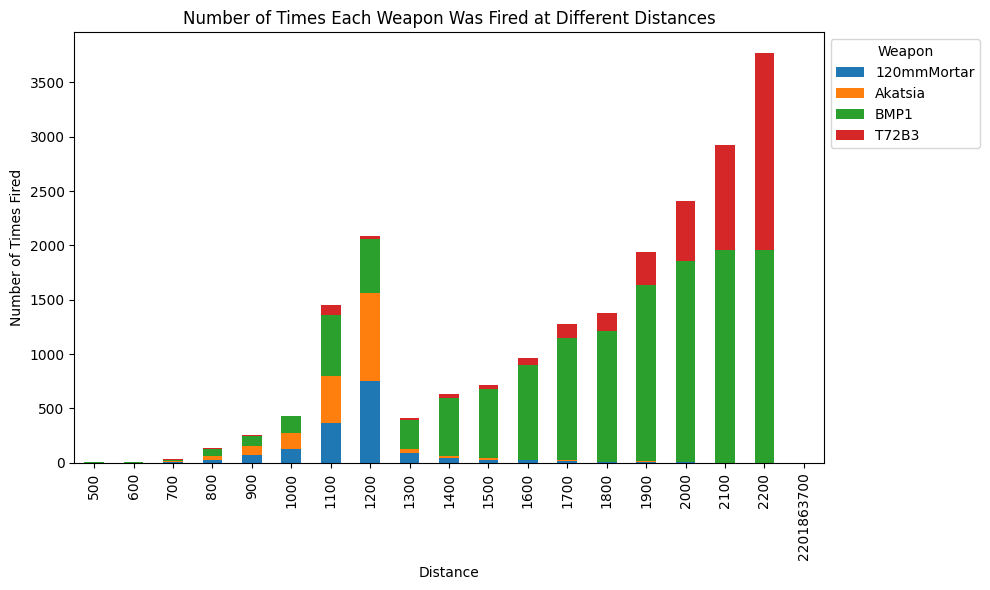

In [8]:
weapon_distance_counts = df.groupby(['Weapon', 'Distance']).size().reset_index(name='Count')

# Pivot the DataFrame to have 'Weapon' as columns
pivot_df = weapon_distance_counts.pivot(index='Distance', columns='Weapon', values='Count').fillna(0)

# Plotting
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Distance')
ax.set_ylabel('Number of Times Fired')
ax.set_title('Number of Times Each Weapon Was Fired at Different Distances')
ax.legend(title='Weapon', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Weapon Type by distance

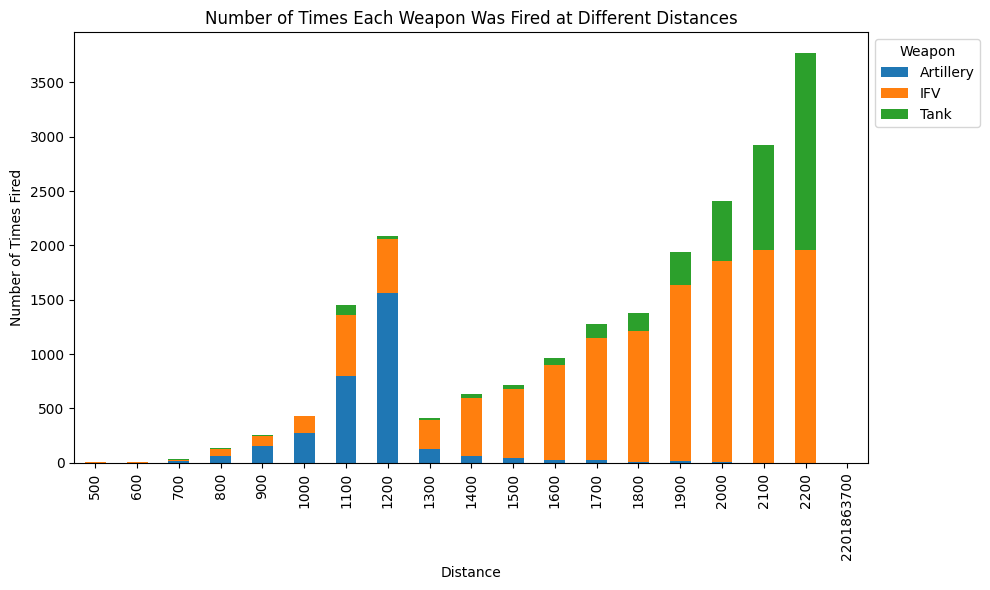

In [9]:
weapon_distance_counts = df.groupby(['Type', 'Distance']).size().reset_index(name='Count')

# Pivot the DataFrame to have 'Weapon' as columns
pivot_df = weapon_distance_counts.pivot(index='Distance', columns='Type', values='Count').fillna(0)

# Plotting
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Distance')
ax.set_ylabel('Number of Times Fired')
ax.set_title('Number of Times Each Weapon Was Fired at Different Distances')
ax.legend(title='Weapon', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Battlegroups

In [10]:
df = pd.read_csv("d:\\Projects\\Dread\\Analysis\\battle_groups.csv", sep=";");

attacker = df[df["Attacking"] == 1]
defender = df[df["Attacking"] == 0]

alive_attacker = attacker[attacker["State"] > 0]
alive_defender = defender[defender["State"] > 0]

dead_attacker = attacker[attacker["State"] <= 0]
dead_defender = defender[defender["State"] <= 0]

df

,Run,Round,Distance,Attacking,Side,GroupIndex,WeaponDomain,Weapon,WeaponType,WeaponIndex,State,Armor
0,0,0,5900,1,RU,0,Ground,120mmMortar,Artillery,0,100,Soft
1,0,0,5900,1,RU,0,Ground,120mmMortar,Artillery,1,100,Soft
2,0,0,5900,1,RU,0,Ground,120mmMortar,Artillery,2,100,Soft
3,0,0,5900,1,RU,0,Ground,120mmMortar,Artillery,3,100,Soft
4,0,0,5900,1,RU,0,Ground,120mmMortar,Artillery,4,100,Soft
...,...,...,...,...,...,...,...,...,...,...,...,...
10464837,999,44,1500,0,UA,0,Ground,T72B3,Tank,109,0,Hard
10464838,999,44,1500,0,UA,0,Ground,T72B3,Tank,110,0,Hard
10464839,999,44,1500,0,UA,0,Ground,T72B3,Tank,110,0,Hard
10464840,999,44,1500,0,UA,0,Ground,T72B3,Tank,111,0,Hard


## Średnia ilość sprzętu na przestrzeni N symulacji

## Średnia ilość sprzęty na starcie

In [11]:
tmp = df[df['Round'] == 0].groupby(['Run', 'Side', 'Weapon']).size().reset_index(name="Total")
tmp.groupby(['Side', 'Weapon']).mean('Total').reset_index().sort_values(["Weapon"])

,Side,Weapon,Run,Total
0,RU,120mmMortar,499.5,7.0
4,UA,120mmMortar,499.5,13.0
1,RU,Akatsia,499.5,5.0
5,UA,Akatsia,499.5,8.0
2,RU,BMP1,499.5,26.0
6,UA,BMP1,499.5,52.0
3,RU,T72B3,499.5,40.0
7,UA,T72B3,499.5,78.0


## Średni stan grup bojowych a dystans

## Straty sprzętowe z podziałem na typ

## Średnie straty w sprzęcie a dystans

## Jaki średnio stan miała dana sztuka broni, w danej rundzie X na przestrzeni N prób

        Run Side       Weapon  Distance  State_mean
0         0   RU  120mmMortar      1800       100.0
1         0   RU  120mmMortar      1900       100.0
2         0   RU  120mmMortar      2000       100.0
3         0   RU  120mmMortar      2100       100.0
4         0   RU  120mmMortar      2200       100.0
...     ...  ...          ...       ...         ...
365579  999   UA        T72B3      5500       600.0
365580  999   UA        T72B3      5600       600.0
365581  999   UA        T72B3      5700       600.0
365582  999   UA        T72B3      5800       600.0
365583  999   UA        T72B3      5900       600.0

[365584 rows x 5 columns]


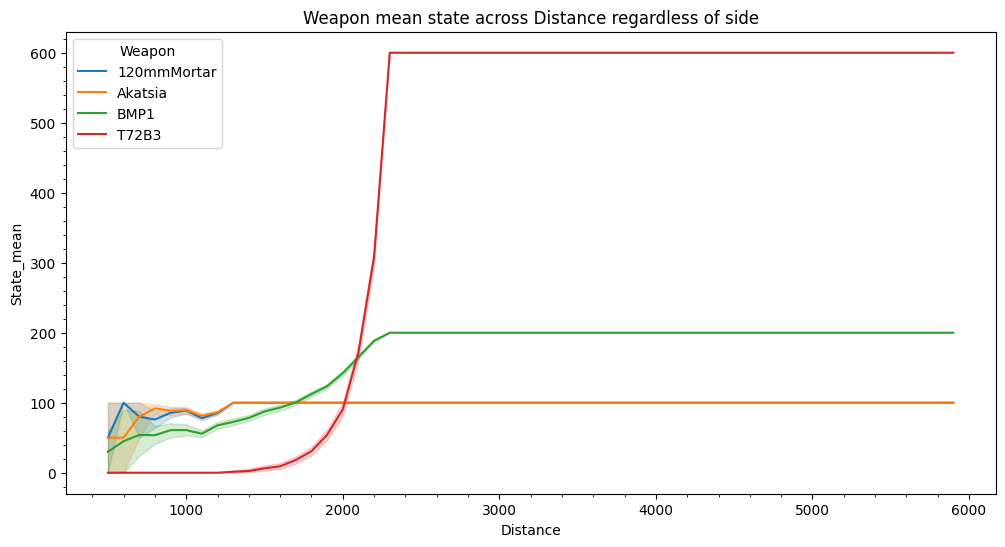

In [12]:
combined = df.groupby(["Run", "Side", "Weapon", "Distance"]).agg({"State": ["mean"]}).reset_index()
combined.columns = ['_'.join(col).rstrip('_') for col in combined.columns.values]

print(combined)

plt.figure(figsize=(12, 6))
plt.title("Weapon mean state across Distance regardless of side")
plt.minorticks_on()
sns.color_palette("tab10")
sns.lineplot(combined, x="Distance", y="State_mean", hue="Weapon")
plt.show()

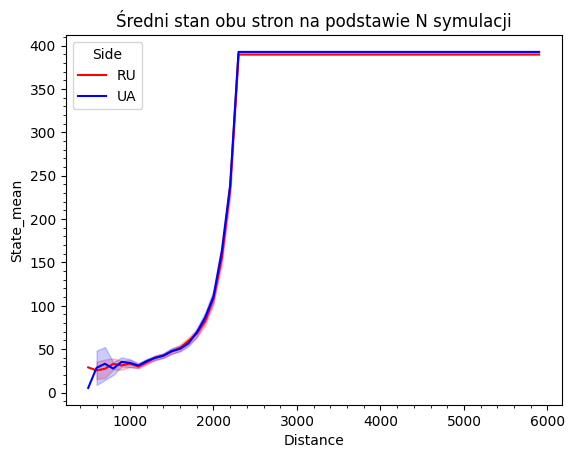

In [13]:
combined = df.groupby(["Run", "Side", "Distance"]).agg({"State": ["mean"]}).reset_index()
combined.columns = ['_'.join(col).rstrip('_') for col in combined.columns.values]

#plt.figure(figsize=(24, 12))
plt.title("Średni stan obu stron na podstawie N symulacji")
plt.minorticks_on()
sns.lineplot(combined, x="Distance", y="State_mean", hue="Side", palette=["RED", "BLUE"])
plt.show()

In [14]:
df["State"].unique()

array([100, 200, 600,   0, 180, 160, 140, 120,  80,  60,  40,  20],
      dtype=int64)

In [15]:
df["Distance"].unique()

array([5900, 5800, 5700, 5600, 5500, 5400, 5300, 5200, 5100, 5000, 4900,
       4800, 4700, 4600, 4500, 4400, 4300, 4200, 4100, 4000, 3900, 3800,
       3700, 3600, 3500, 3400, 3300, 3200, 3100, 3000, 2900, 2800, 2700,
       2600, 2500, 2400, 2300, 2200, 2100, 2000, 1900, 1800, 1700, 1600,
       1500, 1400, 1300, 1200, 1100, 1000,  900,  800,  700,  600,  500],
      dtype=int64)

In [16]:
# atk_grouped_dist = dead_attacker.groupby(["Run", "Distance", "Weapon"]).size().reset_index(name="Size")
# def_grouped_dist = dead_defender.groupby(["Run", "Distance", "Weapon"]).size().reset_index(name="Size")

# #plt.figure(figsize=(24, 12))
# plt.minorticks_on()
# plt.title("Losses in weapon systems");
# sns.scatterplot(atk_grouped_dist, x="Distance", y="Size",color="RED")
# sns.lineplot(atk_grouped_dist, x="Distance", y="Size",color="RED")
# sns.scatterplot(def_grouped_dist, x="Distance", y="Size",color="BLUE")
# sns.lineplot(def_grouped_dist, x="Distance", y="Size",color="BLUE")
# plt.show()

<Axes: title={'center': 'Loses density'}, xlabel='Distance', ylabel='Density'>

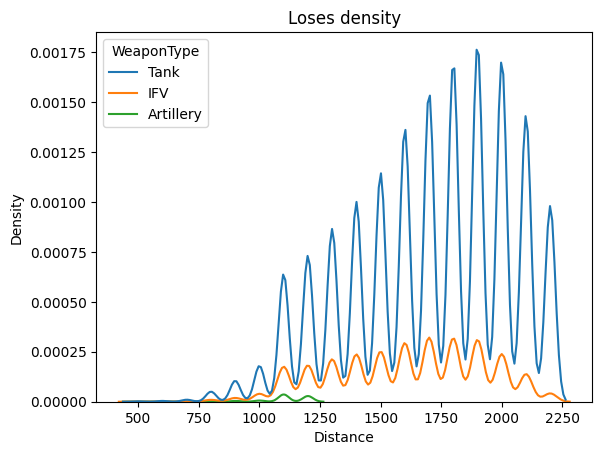

In [17]:
#plt.figure(figsize=(24, 10))
lost = df[df['State'] <= 0]
plt.title("Loses density")
sns.kdeplot(lost, x="Distance",hue="WeaponType")